<a href="https://colab.research.google.com/github/WISEPLAT/test_NN/blob/main/test_NN_v_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/ 
# Log dir for TensorBoard
from datetime import datetime, date
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [94]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import math

In [95]:
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.keras.layers import BatchNormalization # from keras.layers.normalization import BatchNormalization #You have to import Batch Normalization from tensorflow.keras.layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [96]:
# # daily prices from github was exported from finam
# # filename = ('https://github.com/WISEPLAT/SBER-LSTM-Neural-Network-for-Time-Series-Prediction/raw/master/data/SBER_000101_220126_.csv')
# filename = ('https://raw.githubusercontent.com/WISEPLAT/SBER-LSTM-Neural-Network-for-Time-Series-Prediction/master/data/SBER_790101_220205.csv')
# df = pd.read_csv(filename, sep=",")
# print(df.shape, df.columns)
# df.rename(columns={"<DATE>": "Date", "<TIME>": "Time", "<OPEN>": "Open", "<HIGH>": "High", "<LOW>": "Low", "<CLOSE>": "Close", "<VOL>": "Volume"}, inplace=True)
# print(df.shape, df.columns)
# df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
# print(df.shape, df.columns)
# df = df.drop('Time', 1)

In [97]:
# # daily prices from db exported to csv and published to github
#filename = ('https://raw.githubusercontent.com/WISEPLAT/SBER-LSTM-Neural-Network-for-Time-Series-Prediction/master/data/GAZP_D1.csv')
#filename = ('https://raw.githubusercontent.com/WISEPLAT/SBER-LSTM-Neural-Network-for-Time-Series-Prediction/master/data/SBER_D1.csv')
# filename = ('https://raw.githubusercontent.com/WISEPLAT/shares_get_history_class/master/csv_export/CHMF_D1.csv')
filename = ('https://raw.githubusercontent.com/WISEPLAT/shares_get_history_class/master/csv_export/CHMF_H1.csv')

df = pd.read_csv(filename, sep=",")
print(df.shape, df.columns)
#df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')

(27629, 6) Index(['datetime', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [98]:
df

,datetime,open,high,low,close,volume
0,2012-12-18 16:00:00,359.2,359.2,359.2,359.2,1
1,2012-12-18 18:00:00,358.8,358.8,358.8,358.8,1
2,2012-12-19 11:00:00,361.8,361.8,361.8,361.8,1
3,2012-12-19 14:00:00,367.0,367.0,367.0,367.0,20
4,2012-12-19 17:00:00,370.0,370.1,370.0,370.1,66
...,...,...,...,...,...,...
27624,2023-02-17 10:00:00,970.2,979.8,957.4,971.4,112415
27625,2023-02-17 11:00:00,971.0,975.0,966.4,972.4,54902
27626,2023-02-17 12:00:00,972.2,988.2,972.0,979.0,117487
27627,2023-02-17 13:00:00,978.6,981.6,972.4,976.6,65784


In [99]:
df = df[df['datetime']>datetime(2020, 1, 1, 0, 0, 0, 0)]  

In [100]:
df

,datetime,open,high,low,close,volume
17080,2020-01-03 09:00:00,943.4,943.4,943.4,943.4,303
17081,2020-01-03 10:00:00,940.6,946.6,938.4,944.2,77243
17082,2020-01-03 11:00:00,944.4,946.4,940.6,946.0,89950
17083,2020-01-03 12:00:00,946.2,946.4,944.4,945.0,31534
17084,2020-01-03 13:00:00,944.6,946.0,942.6,942.6,33085
...,...,...,...,...,...,...
27624,2023-02-17 10:00:00,970.2,979.8,957.4,971.4,112415
27625,2023-02-17 11:00:00,971.0,975.0,966.4,972.4,54902
27626,2023-02-17 12:00:00,972.2,988.2,972.0,979.0,117487
27627,2023-02-17 13:00:00,978.6,981.6,972.4,976.6,65784


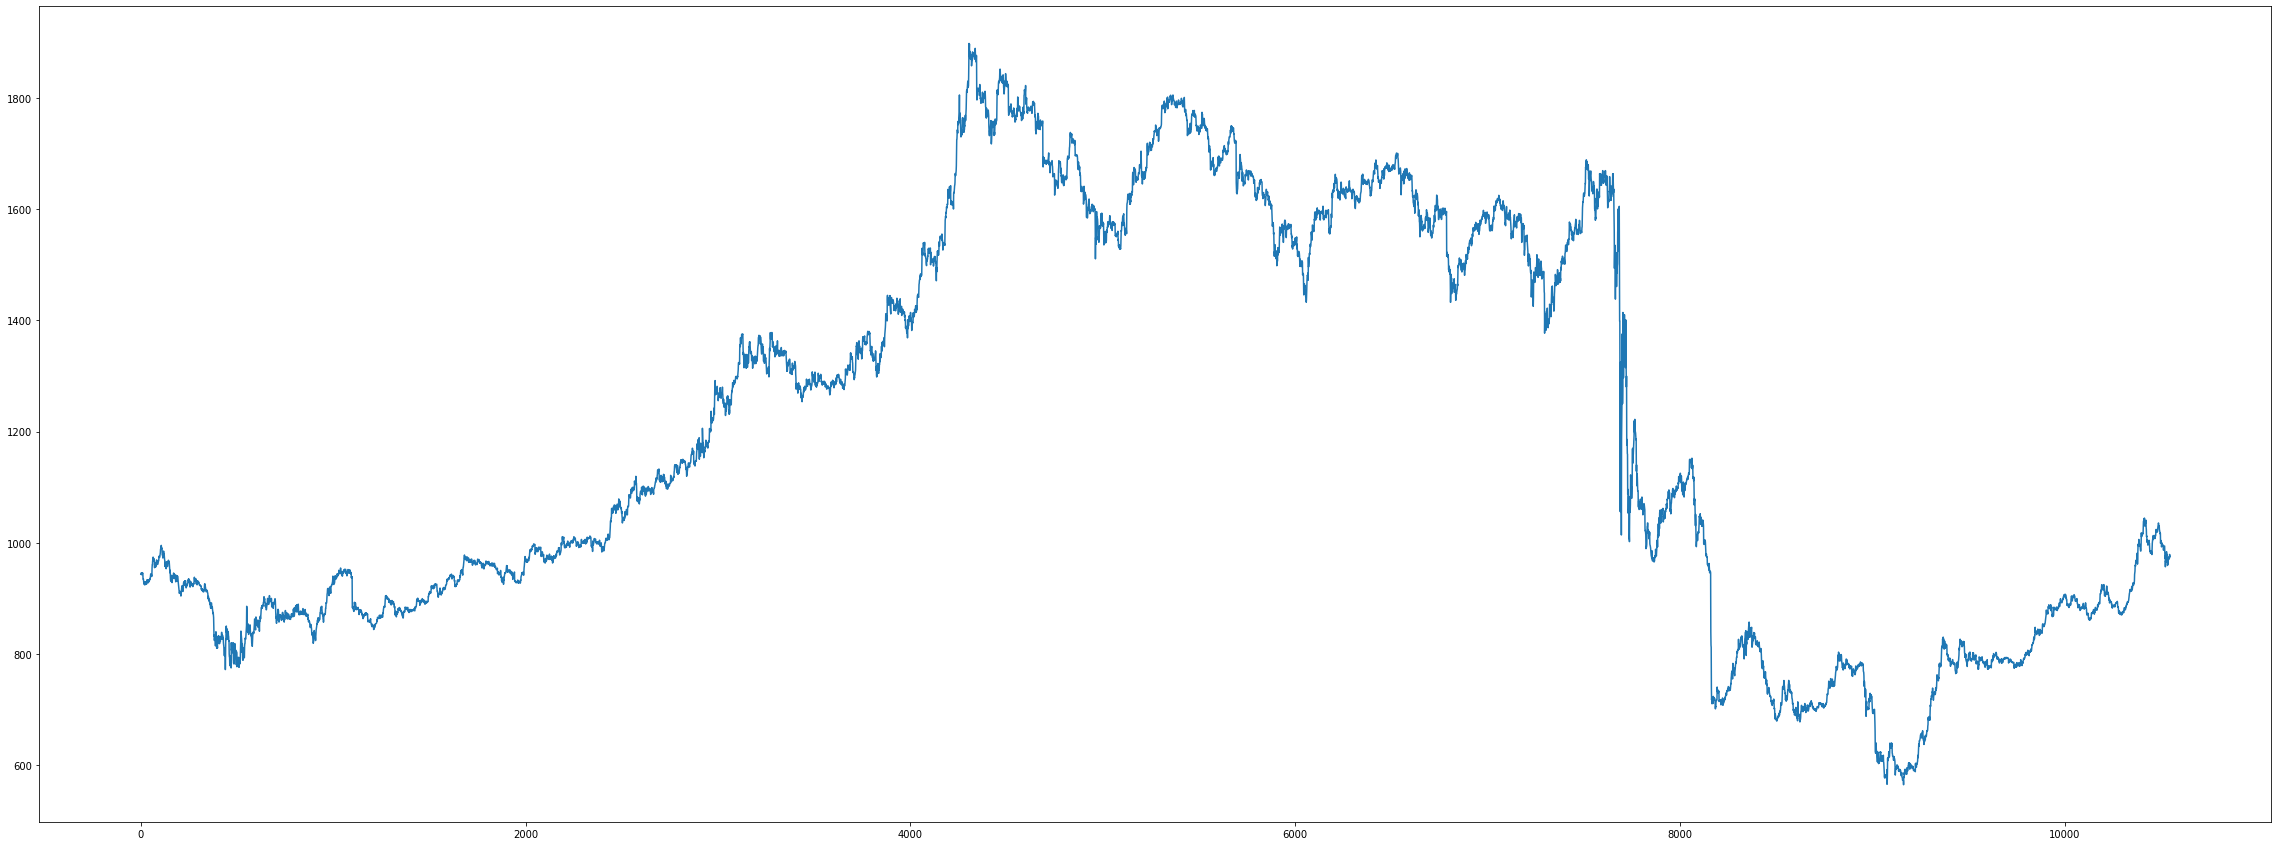

In [106]:
df_close = df.loc[:, 'close']
close_price = df_close.tolist()
plt.rcParams["figure.figsize"] = (40,15)
plt.plot(close_price)
plt.show()